## Semester 1 Project Submission

Please fill out:
* Student name: EJ Donelson and Lorenz Cohen
* Instructor name: Abhineet


# Import all necessary data sets

In [2]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline
import scipy.stats as stats
from math import sqrt

## View the datasets

In [3]:
bom = pd.read_csv("C:/Users/edonelson/Documents/Flatiron/Capstone/capstone-pod-7/data/zippedData/bom.movie_gross.csv.gz")
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
rt_movie = pd.read_csv("C:/Users/edonelson/Documents/Flatiron/Capstone/capstone-pod-7/data/zippedData/rt.movie_info.tsv.gz", sep='\t')
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [5]:
rt_reviews = pd.read_csv("C:/Users/edonelson/Documents/Flatiron/Capstone/capstone-pod-7/data/zippedData/rt.reviews.tsv.gz", sep='\t', encoding='windows-1252')
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [6]:
tmdb = pd.read_csv("C:/Users/edonelson/Documents/Flatiron/Capstone/capstone-pod-7/data/zippedData/tmdb.movies.csv.gz")
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [7]:
tn_budgets = pd.read_csv("C:/Users/edonelson/Documents/Flatiron/Capstone/capstone-pod-7/data/zippedData/tn.movie_budgets.csv.gz")
tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
conn = sqlite3.connect('C:/Users/edonelson/Documents/Flatiron/Capstone/capstone-pod-7/data/zippedData/im.db')
cur = conn.cursor()
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [9]:
pd.read_sql("""
SELECT *
FROM movie_basics
;""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [10]:
#SQL query for to get directors and movie title in same data frame. Used later
director_df = pd.read_sql("""
SELECT DISTINCT(mb.primary_title), mb.start_year, mb.runtime_minutes, p.primary_name
FROM movie_basics AS mb
INNER JOIN directors AS d
  ON mb.movie_id = d.movie_id
INNER JOIN persons AS p
  ON p.person_id = d.person_id
;""", conn)

In [11]:
director_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163174 entries, 0 to 163173
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    163174 non-null  object 
 1   start_year       163174 non-null  int64  
 2   runtime_minutes  130626 non-null  float64
 3   primary_name     163174 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 5.0+ MB


In [12]:
director_df.head()

,primary_title,start_year,runtime_minutes,primary_name
0,Sunghursh,2013,175.0,Harnam Singh Rawail
1,One Day Before the Rainy Season,2019,114.0,Mani Kaul
2,The Other Side of the Wind,2018,122.0,Orson Welles
3,Sabse Bada Sukh,2018,NaN,Hrishikesh Mukherjee
4,The Wandering Soap Opera,2017,80.0,Raoul Ruiz


In [13]:
pd.read_sql("""
SELECT *
FROM directors
;""", conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [14]:
pd.read_sql("""
SELECT *
FROM known_for
;""", conn)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [15]:
pd.read_sql("""
SELECT *
FROM movie_akas
;""", conn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [16]:
pd.read_sql("""
SELECT *
FROM movie_ratings
;""", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [17]:
pd.read_sql("""
SELECT *
FROM persons
;""", conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [18]:
pd.read_sql("""
SELECT *
FROM principals
;""", conn)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [19]:
pd.read_sql("""
SELECT *
FROM writers
;""", conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


# Begin cleaning the Box Office Mojo Dataset

### View Box Office Mojo dataset info

In [20]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


We notice that foreign_gross is missing the most data, presumably because certain movies did not get released internationally, so we decide to fill these NA's with zeros. We also notice that this column is currently in string format, so we remove the commas first and then convert to float (similar to domestic_gross) after filling the NA's.

In [21]:
bom['foreign_gross']= bom['foreign_gross'].str.replace(',','')

In [22]:
bom['foreign_gross'] = bom['foreign_gross'].fillna(0)

In [23]:
bom = bom.astype({'foreign_gross': float})

We view the data set again and see that now all the rows contain non-null values.

In [24]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


We would like to follow the same methodology for missing domestic_gross values, but want to confirm that rows with NA's have a value other than 0 for foreign gross.

In [25]:
bom[bom['domestic_gross'].isna()]

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000.0,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000.0,2010
302,White Lion,Scre.,NaN,99600.0,2010
306,Badmaash Company,Yash,NaN,64400.0,2010
327,Aashayein (Wishes),Relbig.,NaN,3800.0,2010
537,Force,FoxS,NaN,4800000.0,2011
713,Empire of Silver,NeoC,NaN,19000.0,2011
871,Solomon Kane,RTWC,NaN,19600000.0,2012
928,The Tall Man,Imag.,NaN,5200000.0,2012
933,Keith Lemon: The Film,NaN,NaN,4000000.0,2012


Now that we've confirmed that every column with NA values in domestic_gross has some foreign_gross value other than 0, we can assume that these movies were not released domestically and fill the NA's with zeros.

In [26]:
bom['domestic_gross'] = bom['domestic_gross'].fillna(0)

We view that dataset again to confirm all rows have non-null values in the domestic_gross column.

In [27]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


Because there are only 5 missing values in the studio column, we believe the best action is to remove those rows.

In [28]:
bom = bom[bom['studio'].notna()]

Now all rows are complete with non-null values in every column.

In [29]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


We view the dataset's statistics with .describe() to confirm there is nothing that looks like it doesn't belong. Specifically, the year column, to make sure the range of years makes sense. It appears that it does.

In [30]:
bom.describe()

,domestic_gross,foreign_gross,year
count,3.382000e+03,3.382000e+03,3382.000000
mean,2.855030e+07,4.505716e+07,2013.959787
std,6.679610e+07,1.127504e+08,2.477735
min,0.000000e+00,0.000000e+00,2010.000000
25%,1.120000e+05,0.000000e+00,2012.000000
50%,1.300000e+06,1.450000e+06,2014.000000
75%,2.767500e+07,2.917500e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


# View the Rotten Tomatoes Movies dataset info

In [31]:
rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


This is a messy one with not much movie information. If we believe that we need some info from this dataset, we will come back to it. For now, we will move on.

# View the Rotten Tomatoes Reviews dataset

In [32]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


The dataset is not quite as messy as the previous and may be workable. The questions remains if the information is relevant enough for us to perform analysis. Even if we joined this dataset with Rotten Tomatoes movies by id, we have no information about which movie is referred to in the rows. It may be useful to begin cleaning and then later determine if this data is worth analyzing further.

In [33]:
rt_reviews = rt_reviews[rt_reviews['rating'].notna()]

We start by removing about 14 thousand rows with NA values in the rating column. This seems to be the most useful column from this dataset, and we do not believe filling the NA's with a mean rating makes sense. Even though it seems like we are removing a lot, we are still left with 75% of the original data.

In [34]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40915 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          40915 non-null  int64 
 1   review      35379 non-null  object
 2   rating      40915 non-null  object
 3   fresh       40915 non-null  object
 4   critic      38935 non-null  object
 5   top_critic  40915 non-null  int64 
 6   publisher   40688 non-null  object
 7   date        40915 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.8+ MB


In [35]:
rt_reviews = rt_reviews[rt_reviews['critic'].notna()]

In [36]:
rt_reviews = rt_reviews[rt_reviews['publisher'].notna()]

In [37]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38734 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          38734 non-null  int64 
 1   review      33988 non-null  object
 2   rating      38734 non-null  object
 3   fresh       38734 non-null  object
 4   critic      38734 non-null  object
 5   top_critic  38734 non-null  int64 
 6   publisher   38734 non-null  object
 7   date        38734 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.7+ MB


We decided to remove NA values for critic and publisher as well. These only remove about 2 thousand rows from the dataset and we are left with over 38 thousand still. We considered removing NA values for review as well, but unless we are finding review word counts or performing textual analysis, we may not even be concerned with this column so we decide to leave it for now.

In [38]:
rt_reviews['top_critic'].unique()

array([0, 1], dtype=int64)

Here we understand that top_critic is binary and represents whether the person listed in the critic column is the top critic or not.

In [39]:
rt_reviews['rating'].value_counts()

3/5      4015
3/4      3471
4/5      3394
2/5      2977
2/4      2622
         ... 
3.1         1
T           1
2.3/4       1
8.5         1
3.3         1
Name: rating, Length: 182, dtype: int64

We look at the rating column to determine if this could be worth while for us to consider as a target variable. It looks messy. Values out of 4, 5, 10, and even some letter grades. Some are fractions and some are decimals. We will move on for now and come back if we want to use ratings as the target variable.

# Begin cleaning The Movie DB dataset

In [40]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


Thankfully, all of the rows are complete with non-null values in this dataset. The datatypes seem to make sense, we just want to explore what some of these look like to see if they may be useful in our analysis. Specifically, we want to look at what popularity is and what the distribution looks like for original_language.

In [41]:
tmdb['popularity'].value_counts()

0.600     7037
1.400      649
0.840      587
0.624      104
0.625       92
          ... 
3.742        1
14.749       1
7.924        1
8.414        1
9.060        1
Name: popularity, Length: 7425, dtype: int64

In [42]:
tmdb['popularity'].max()

80.773

Popularity is a little hard to interpret. Many values are very small, but some get as big as 80. The TMDB website says they have a formula for calculating a popularity rating, but it consists of data that we do not have access to. It also appears that this is a current value, and may change over time, so older movies that started out with high popularity ratings may have gone down by now. May disregard for our analysis.

In [43]:
tmdb['original_language'].value_counts()

en    23291
fr      507
es      455
ru      298
ja      265
      ...  
yi        1
si        1
hz        1
kk        1
cr        1
Name: original_language, Length: 76, dtype: int64

A large majority of movies seem to be in english. This makes sense because most movies in these datasets are primarily US based, so this metric may not be as useful for our analysis as others.

In [44]:
tmdb['release_date'] = pd.to_datetime(tmdb['release_date'])

We changed release_date to a datetime data type.

# Begin cleaning The Numbers dataset

In [45]:
tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Again, we have a relatively clean dataset to start. The only things to do would be convert production_budget, domestic_gross, and worldwide_gross to integer data types and change release_date to datetime data type.

In [46]:
tn_budgets['release_date'] = pd.to_datetime(tn_budgets['release_date'])

In [47]:
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace('$','')
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace(',','')

In [48]:
tn_budgets = tn_budgets.astype({'production_budget': 'int64'})

In [49]:
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.replace('$','')
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.replace(',','')

In [50]:
tn_budgets = tn_budgets.astype({'domestic_gross': 'int64'})

In [51]:
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace('$','')
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace(',','')

In [52]:
tn_budgets = tn_budgets.astype({'worldwide_gross': 'int64'})

In [53]:
tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [54]:
tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


Below we do some basic scatter plots of budget vs gross just to make sure our transformations worked.

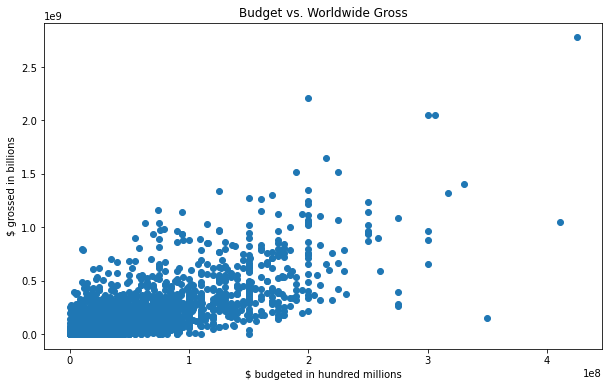

In [55]:
x = tn_budgets['production_budget']
y =tn_budgets['worldwide_gross']
plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.xlabel('$ budgeted in hundred millions')
plt.ylabel('$ grossed in billions')
plt.title('Budget vs. Worldwide Gross');

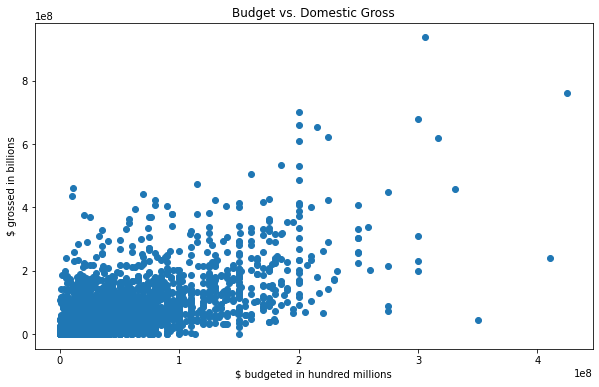

In [56]:
x = tn_budgets['production_budget']
y =tn_budgets['domestic_gross']
plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.xlabel('$ budgeted in hundred millions')
plt.ylabel('$ grossed in billions')
plt.title('Budget vs. Domestic Gross');

# Turn focus to Analysis on Movie Genre

### Start with Rotten Tomatoes Movie dataset

There are 2 datasets that provide information about genre, rt_movie and tmdb (not including the movie basics table in the imdb database. Our first thought was to utilize the rt_movie database, because the genres are provided in plain text as opposed to number codes. We would like to clean up this column, merge with the imdb database by director name (this will also give us movie title), and then merge again with tn_budgets to get revenue information. We will see later that this did not lead to any useful findings, but we will show our process anyway.

At first, we also considered seeing if we could perform analysis on director names, but after performing these steps and seeing where we ended up we decided against it because it was not useful.

In [57]:
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


We begin cleaning the genre column by removing | and the word "and" from the strings. Some of the cells were also NA floats so we had to convert all observations to strings. Then we used .split() to create a list of genres.

In [58]:
rt_movie['genre'] = rt_movie['genre'].str.replace("|"," ")

In [59]:
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure Classics Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [60]:
rt_movie['genre'] = rt_movie['genre'].str.replace("and ", "")

In [61]:
rt_movie = rt_movie.astype({'genre': 'str'})

In [62]:
rt_movie['genre'] = rt_movie['genre'].apply(lambda x: x.split(" "))

In [63]:
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,"[Action, Adventure, Classics, Drama]",William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,"[Drama, Science, Fiction, Fantasy]",David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,"[Drama, Musical, Performing, Arts]",Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,"[Drama, Mystery, Suspense]",Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,"[Drama, Romance]",Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [64]:
#confirm data type in genre column
type(rt_movie['genre'][0])

list

In [65]:
#get unique list of genres in dataframe
unique_list = []
for lst in rt_movie['genre']:
    for element in lst:
        if element in unique_list:
            continue
        else:
            unique_list.append(element)
print(unique_list)

['Action', 'Adventure', 'Classics', 'Drama', 'Science', 'Fiction', 'Fantasy', 'Musical', 'Performing', 'Arts', 'Mystery', 'Suspense', 'Romance', 'Kids', 'Family', 'Comedy', 'nan', 'Documentary', 'Special', 'Interest', 'Art', 'House', 'International', 'Horror', 'Western', 'Television', 'Sports', 'Fitness', 'Animation', 'Faith', 'Spirituality', 'Cult', 'Movies', 'Anime', 'Manga', 'Gay', 'Lesbian']


In [66]:
#remove nan's 
for lst in rt_movie['genre']:
    for element in lst:
        if element == 'nan':
            lst.remove('nan')
        else:
            continue

In [67]:
#confirm nan's are gone
unique_list = []
for lst in rt_movie['genre']:
    for element in lst:
        if element in unique_list:
            continue
        else:
            unique_list.append(element)
print(unique_list)

['Action', 'Adventure', 'Classics', 'Drama', 'Science', 'Fiction', 'Fantasy', 'Musical', 'Performing', 'Arts', 'Mystery', 'Suspense', 'Romance', 'Kids', 'Family', 'Comedy', 'Documentary', 'Special', 'Interest', 'Art', 'House', 'International', 'Horror', 'Western', 'Television', 'Sports', 'Fitness', 'Animation', 'Faith', 'Spirituality', 'Cult', 'Movies', 'Anime', 'Manga', 'Gay', 'Lesbian']


When we split by " ", the genre "Performing Arts" was separated into 2 genres. We correct that here.

In [68]:
#remove Arts from genre lists
for lst in rt_movie['genre']:
    for element in lst:
        if element == 'Arts':
            lst.remove('Arts')
        else:
            continue

In [69]:
#rename Performing to Performing Arts in genre lists
for lst in rt_movie['genre']:
    for i in range(len(lst)):
            if lst[i] == 'Performing':
                lst[i] = 'Performing Arts'
            else:
                continue

In [70]:
#view unique list one last time
unique_list = []
for lst in rt_movie['genre']:
    for element in lst:
        if element in unique_list:
            continue
        else:
            unique_list.append(element)
print(unique_list)

['Action', 'Adventure', 'Classics', 'Drama', 'Science', 'Fiction', 'Fantasy', 'Musical', 'Performing Arts', 'Mystery', 'Suspense', 'Romance', 'Kids', 'Family', 'Comedy', 'Documentary', 'Special', 'Interest', 'Art', 'House', 'International', 'Horror', 'Western', 'Television', 'Sports', 'Fitness', 'Animation', 'Faith', 'Spirituality', 'Cult', 'Movies', 'Anime', 'Manga', 'Gay', 'Lesbian']


In [71]:
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,"[Action, Adventure, Classics, Drama]",William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,"[Drama, Science, Fiction, Fantasy]",David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,"[Drama, Musical, Performing Arts]",Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,"[Drama, Mystery, Suspense]",Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,"[Drama, Romance]",Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


Joining by director name is not completely accurate, so we would like to also join by runtime to be more specific. We clean up this column by removing " minutes", dropping NA's, and turning into integers.

In [72]:
rt_movie['runtime'] = rt_movie['runtime'].str.replace(" minutes", "")

In [73]:
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,"[Action, Adventure, Classics, Drama]",William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,"[Drama, Science, Fiction, Fantasy]",David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,"[Drama, Musical, Performing Arts]",Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,"[Drama, Mystery, Suspense]",Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128,NaN
4,7,NaN,NR,"[Drama, Romance]",Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200,NaN


In [74]:
director_df = director_df[director_df['runtime_minutes'].notna()]

In [75]:
director_df['runtime_minutes'] = director_df['runtime_minutes'].replace(".0", "")

In [76]:
rt_movie = rt_movie[rt_movie['runtime'].notna()]

In [77]:
rt_movie = rt_movie.astype({'runtime': 'int64'})

In [78]:
merged = pd.merge(rt_movie, director_df, left_on=['director', 'runtime'], right_on=['primary_name', 'runtime_minutes'])

In [79]:
merged

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,primary_title,start_year,runtime_minutes,primary_name
0,14,"""Love Ranch"" is a bittersweet love story that ...",R,[Drama],Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117,NaN,Love Ranch,2010,117.0,Taylor Hackford
1,22,Two-time Academy Award Winner Kevin Spacey giv...,R,"[Comedy, Drama, Mystery, Suspense]",George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108,ATO Pictures,Casino Jack,2010,108.0,George Hickenlooper
2,66,"Niels Arden Oplev, the acclaimed director of t...",R,"[Mystery, Suspense]",Niels Arden Oplev,NaN,"Mar 8, 2013","Jul 9, 2013",$,"10,880,926",118,FilmDistrict,Dead Man Down,2013,118.0,Niels Arden Oplev
3,102,"Aging, small town attorney Mac McClain (Matthe...",PG-13,"[Drama, Mystery, Suspense]",Gary Wheeler,Mark Freiburger|Gary Wheeler|Robert Whitlow|Ma...,NaN,NaN,NaN,NaN,101,Fox,The Trial,2010,101.0,Gary Wheeler
4,106,Three dope-smoking ex-convicts live among frie...,R,[Comedy],Mike Clattenburg,Mike Clattenburg|Robb Wells,"Jun 6, 2006","Apr 22, 2008",NaN,NaN,95,Screen Media Films,Moving Day,2012,95.0,Mike Clattenburg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,1819,"In the year 2045, people can escape their hars...",PG-13,"[Action, Adventure, Science, Fiction, Fantasy]",Steven Spielberg,Zak Penn|Ernest Cline,"Mar 29, 2018","Jul 3, 2018",NaN,NaN,140,Warner Bros. Pictures,Ready Player One,2018,140.0,Steven Spielberg
132,1864,Four friends stumble into a deal too good to r...,NR,[Drama],Jackie Earle Haley,Robert Lowell,"Nov 20, 2015","Feb 16, 2016",NaN,NaN,94,NaN,Criminal Activities,2015,94.0,Jackie Earle Haley
133,1901,When charismatic terrorist Adam Qasim escapes ...,R,"[Action, Adventure, Art, House, International,...",Bharat Nalluri,Samuel Vincent|Jonathan Brackley|Sam Vincent,"Dec 4, 2015","Feb 9, 2016",NaN,NaN,104,NaN,MI-5,2015,104.0,Bharat Nalluri
134,1901,When charismatic terrorist Adam Qasim escapes ...,R,"[Action, Adventure, Art, House, International,...",Bharat Nalluri,Samuel Vincent|Jonathan Brackley|Sam Vincent,"Dec 4, 2015","Feb 9, 2016",NaN,NaN,104,NaN,The Man Who Invented Christmas,2017,104.0,Bharat Nalluri


We see here that the number of rows has been shrunk to 136. And some of the start_year's do not match theater dates. Below we create a Year column from theater_date and drop rows where start_year does not match the theater_date year.

In [80]:
merged['theater_date'] = pd.to_datetime(merged['theater_date'])

In [81]:
merged['Year'] = merged['theater_date'].dt.year

In [82]:
merged = merged[merged['Year'].notna()]

In [83]:
merged = merged.astype({'Year': 'int64'})

In [84]:
merged.drop(index=merged[(merged.Year != merged.start_year )].index)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,primary_title,start_year,runtime_minutes,primary_name,Year
0,14,"""Love Ranch"" is a bittersweet love story that ...",R,[Drama],Taylor Hackford,Mark Jacobson,2010-06-30,"Nov 9, 2010",$,"134,904",117,NaN,Love Ranch,2010,117.0,Taylor Hackford,2010
1,22,Two-time Academy Award Winner Kevin Spacey giv...,R,"[Comedy, Drama, Mystery, Suspense]",George Hickenlooper,Norman Snider,2010-12-17,"Apr 5, 2011",$,"1,039,869",108,ATO Pictures,Casino Jack,2010,108.0,George Hickenlooper,2010
2,66,"Niels Arden Oplev, the acclaimed director of t...",R,"[Mystery, Suspense]",Niels Arden Oplev,NaN,2013-03-08,"Jul 9, 2013",$,"10,880,926",118,FilmDistrict,Dead Man Down,2013,118.0,Niels Arden Oplev,2013
8,188,From the producers of Little Miss Sunshine - W...,R,"[Comedy, Drama]",Colin Trevorrow,Derek Connolly,2012-06-08,"Oct 30, 2012",$,"4,007,792",86,Film District,Safety Not Guaranteed,2012,86.0,Colin Trevorrow,2012
11,251,"In this adaptation of the novel ""The Price of ...",R,"[Drama, Romance]",Todd Haynes,Phyllis Nagy,2015-11-20,"Mar 15, 2016",$,"8,518,148",118,The Weinstein Company,Carol,2015,118.0,Todd Haynes,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1762,Adapted from the bestselling novel by author J...,PG-13,[Drama],Jake Schreier,NaN,2015-07-24,"Oct 20, 2015",NaN,NaN,109,20th Century Fox,Paper Towns,2015,109.0,Jake Schreier,2015
131,1819,"In the year 2045, people can escape their hars...",PG-13,"[Action, Adventure, Science, Fiction, Fantasy]",Steven Spielberg,Zak Penn|Ernest Cline,2018-03-29,"Jul 3, 2018",NaN,NaN,140,Warner Bros. Pictures,Ready Player One,2018,140.0,Steven Spielberg,2018
132,1864,Four friends stumble into a deal too good to r...,NR,[Drama],Jackie Earle Haley,Robert Lowell,2015-11-20,"Feb 16, 2016",NaN,NaN,94,NaN,Criminal Activities,2015,94.0,Jackie Earle Haley,2015
133,1901,When charismatic terrorist Adam Qasim escapes ...,R,"[Action, Adventure, Art, House, International,...",Bharat Nalluri,Samuel Vincent|Jonathan Brackley|Sam Vincent,2015-12-04,"Feb 9, 2016",NaN,NaN,104,NaN,MI-5,2015,104.0,Bharat Nalluri,2015


Now we have shrunk the number of rows to 61, and we still do not have revenue information.

In [85]:
final = pd.merge(merged, tn_budgets, left_on=['primary_title'], right_on=['movie'])

In [86]:
final

,id_x,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,...,start_year,runtime_minutes,primary_name,Year,id_y,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,14,"""Love Ranch"" is a bittersweet love story that ...",R,[Drama],Taylor Hackford,Mark Jacobson,2010-06-30,"Nov 9, 2010",$,"134,904",...,2010,117.0,Taylor Hackford,2010,19,2010-06-30,Love Ranch,25000000,137885,146149
1,22,Two-time Academy Award Winner Kevin Spacey giv...,R,"[Comedy, Drama, Mystery, Suspense]",George Hickenlooper,Norman Snider,2010-12-17,"Apr 5, 2011",$,"1,039,869",...,2010,108.0,George Hickenlooper,2010,32,2010-12-17,Casino Jack,12500000,2039869,2272186
2,66,"Niels Arden Oplev, the acclaimed director of t...",R,"[Mystery, Suspense]",Niels Arden Oplev,NaN,2013-03-08,"Jul 9, 2013",$,"10,880,926",...,2013,118.0,Niels Arden Oplev,2013,78,2013-03-08,Dead Man Down,30000000,10895295,19599974
3,158,The film tells the inspiring true story of how...,PG-13,"[Drama, Sports, Fitness]",Clint Eastwood,Anthony Peckham,2009-12-11,"May 18, 2010",$,"37,431,431",...,2014,134.0,Clint Eastwood,2009,43,2014-06-20,Jersey Boys,40000000,47047013,65282732
4,188,From the producers of Little Miss Sunshine - W...,R,"[Comedy, Drama]",Colin Trevorrow,Derek Connolly,2012-06-08,"Oct 30, 2012",$,"4,007,792",...,2012,86.0,Colin Trevorrow,2012,77,2012-06-08,Safety Not Guaranteed,750000,4010957,4422318
5,251,"In this adaptation of the novel ""The Price of ...",R,"[Drama, Romance]",Todd Haynes,Phyllis Nagy,2015-11-20,"Mar 15, 2016",$,"8,518,148",...,2015,118.0,Todd Haynes,2015,60,2015-11-20,Carol,11800000,12711491,42843521
6,300,Liz Gilbert had everything a modern woman is s...,PG-13,[Drama],Ryan Murphy,Ryan Murphy|Jennifer Salt,2010-08-13,"Nov 23, 2010",$,"80,574,010",...,2010,133.0,Ryan Murphy,2010,67,2010-08-13,Eat Pray Love,60000000,80574010,206598789
7,321,Unlimited funds have allowed Diana (McCarthy) ...,R,[Comedy],Seth Gordon,Craig Mazin,2013-02-07,"Jun 4, 2013",$,"134,455,175",...,2013,111.0,Seth Gordon,2013,32,2013-02-08,Identity Thief,35000000,134506920,175361578
8,322,When her heart is stolen by a seductive strang...,R,[Horror],Guillermo del Toro,Guillermo del Toro|Matthew Robbins|Lucinda Coxon,2015-10-16,"Feb 9, 2016",$,"25,957,696",...,2015,119.0,Guillermo del Toro,2015,33,2015-10-16,Crimson Peak,55000000,31090320,74966854
9,326,Unique improvisational techniques are employed...,PG-13,"[Comedy, Drama]",Mike Leigh,Mike Leigh,2010-12-29,"Jun 7, 2011",$,"3,200,000",...,2010,129.0,Mike Leigh,2010,8,2010-12-29,Another Year,8000000,3205706,20005613


With only 54 rows in the final dataframe, we decide that we do not have enough remaining data to make useful conclusions. We decide to move on to using the tmdb dataset with number codes as genre ids.

### Change direction to use tmdb dataset

First we merge tmdb with tn_budgets to get genre information and revenue information in one place.

In [87]:
genre_df = pd.merge(tmdb, tn_budgets, left_on=['title'], right_on=['movie'])

In [88]:
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2384
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         2385 non-null   int64         
 1   genre_ids          2385 non-null   object        
 2   id_x               2385 non-null   int64         
 3   original_language  2385 non-null   object        
 4   original_title     2385 non-null   object        
 5   popularity         2385 non-null   float64       
 6   release_date_x     2385 non-null   datetime64[ns]
 7   title              2385 non-null   object        
 8   vote_average       2385 non-null   float64       
 9   vote_count         2385 non-null   int64         
 10  id_y               2385 non-null   int64         
 11  release_date_y     2385 non-null   datetime64[ns]
 12  movie              2385 non-null   object        
 13  production_budget  2385 non-null   int64         
 14  domestic

We see that we have shrunk the dataset to 2385 but believe that to be sufficient enough to conduct further analysis.

In [89]:
genre_df

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,2010-03-26,How to Train Your Dragon,165000000,217581232,494870992
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,2010-05-07,Iron Man 2,170000000,312433331,621156389
2,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,1995-11-22,Toy Story,30000000,191796233,364545516
3,2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,1995-11-22,Toy Story,30000000,191796233,364545516
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,38,2010-07-16,Inception,160000000,292576195,835524642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,26323,[],509316,en,The Box,0.600,2018-03-04,The Box,8.0,1,66,2009-11-06,The Box,25000000,15051977,34356760
2381,26425,[10402],509306,en,The Box,0.600,2018-03-04,The Box,6.0,1,66,2009-11-06,The Box,25000000,15051977,34356760
2382,26092,"[35, 16]",546674,en,Enough,0.719,2018-03-22,Enough,8.7,3,68,2002-05-24,Enough,38000000,39177215,50970660
2383,26322,[],513161,en,Undiscovered,0.600,2018-04-07,Undiscovered,8.0,1,7,2005-08-26,Undiscovered,9000000,1069318,1069318


We notice some duplicates and choose to remove those.

In [90]:
genre_df = genre_df[genre_df['title'] != 'Home']

In [91]:
genre_df = genre_df.drop_duplicates(subset='title')

In [92]:
genre_df

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,2010-03-26,How to Train Your Dragon,165000000,217581232,494870992
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,2010-05-07,Iron Man 2,170000000,312433331,621156389
2,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,1995-11-22,Toy Story,30000000,191796233,364545516
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,38,2010-07-16,Inception,160000000,292576195,835524642
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,17,2010-02-12,Percy Jackson & the Olympians: The Lightning T...,95000000,88768303,223050874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,25825,"[28, 878]",448764,en,Molly,1.400,2018-09-25,Molly,5.8,5,81,1999-10-22,Molly,21000000,17396,17396
2377,26040,[],509314,en,The Box,0.840,2018-03-04,The Box,8.0,1,66,2009-11-06,The Box,25000000,15051977,34356760
2382,26092,"[35, 16]",546674,en,Enough,0.719,2018-03-22,Enough,8.7,3,68,2002-05-24,Enough,38000000,39177215,50970660
2383,26322,[],513161,en,Undiscovered,0.600,2018-04-07,Undiscovered,8.0,1,7,2005-08-26,Undiscovered,9000000,1069318,1069318


We are ultimately left with 1923 rows in the dataset which we still believe to be ok.

We decide we want our target variable to be Net Revenue, so we subtract production budget from worldwide gross. We make the assumption that in order to produce the movie, all of the production budget was used and ONLY the production budget. In other words, no more and no less than the production budget was spent in the creation of a movie.

In [93]:
genre_df['Net Revenue'] = genre_df['worldwide_gross'] - genre_df['production_budget']

In [94]:
genre_df.head()

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,Net Revenue
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,2010-03-26,How to Train Your Dragon,165000000,217581232,494870992,329870992
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,2010-05-07,Iron Man 2,170000000,312433331,621156389,451156389
2,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,1995-11-22,Toy Story,30000000,191796233,364545516,334545516
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,38,2010-07-16,Inception,160000000,292576195,835524642,675524642
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,17,2010-02-12,Percy Jackson & the Olympians: The Lightning T...,95000000,88768303,223050874,128050874


We realize the genre codes are in long strings. We remove the brackets and commas and split the codes by " " into a list.

In [95]:
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace("[", "")

In [96]:
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace("]", "")

In [97]:
genre_df['genre_ids'] = genre_df['genre_ids'].str.replace(",", "")

In [98]:
genre_df['genre_ids'] = genre_df['genre_ids'].apply(lambda x: x.split(" "))

In [99]:
genre_df['genre_ids'][0]

['14', '12', '16', '10751']

We found a key on the TMDB website that says what genre each number code relate to. Below we use a for loop to change them in the dataframe.

In [100]:
for lst in genre_df['genre_ids']:
    for i in range(len(lst)):
            if lst[i] == '12':
                lst[i] = 'Adventure'
            elif lst[i] == '14':
                lst[i] = 'Fantasy'
            elif lst[i] == '28':
                lst[i] = 'Action'
            elif lst[i] == '16':
                lst[i] = 'Animation'
            elif lst[i] == '35':
                lst[i] = 'Comedy'
            elif lst[i] == '80':
                lst[i] = 'Crime'
            elif lst[i] == '99':
                lst[i] = 'Documentary'
            elif lst[i] == '18':
                lst[i] = 'Drama'
            elif lst[i] == '10751':
                lst[i] = 'Family'
            elif lst[i] == '36':
                lst[i] = 'History'
            elif lst[i] == '27':
                lst[i] = 'Horror'
            elif lst[i] == '10402':
                lst[i] = 'Music'
            elif lst[i] == '9648':
                lst[i] = 'Mystery'
            elif lst[i] == '10749':
                lst[i] = 'Romance'
            elif lst[i] == '878':
                lst[i] = 'SciFi'
            elif lst[i] == '10770':
                lst[i] = 'TV Movie'
            elif lst[i] == '53':
                lst[i] = 'Thriller'
            elif lst[i] == '10752':
                lst[i] = 'War'
            elif lst[i] == '37':
                lst[i] = 'Western'

In [101]:
genre_df

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,Net Revenue
0,1,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,2010-03-26,How to Train Your Dragon,165000000,217581232,494870992,329870992
1,2,"[Adventure, Action, SciFi]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,2010-05-07,Iron Man 2,170000000,312433331,621156389,451156389
2,3,"[Animation, Comedy, Family]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,1995-11-22,Toy Story,30000000,191796233,364545516,334545516
4,4,"[Action, SciFi, Adventure]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,38,2010-07-16,Inception,160000000,292576195,835524642,675524642
5,5,"[Adventure, Fantasy, Family]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,17,2010-02-12,Percy Jackson & the Olympians: The Lightning T...,95000000,88768303,223050874,128050874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,25825,"[Action, SciFi]",448764,en,Molly,1.400,2018-09-25,Molly,5.8,5,81,1999-10-22,Molly,21000000,17396,17396,-20982604
2377,26040,[],509314,en,The Box,0.840,2018-03-04,The Box,8.0,1,66,2009-11-06,The Box,25000000,15051977,34356760,9356760
2382,26092,"[Comedy, Animation]",546674,en,Enough,0.719,2018-03-22,Enough,8.7,3,68,2002-05-24,Enough,38000000,39177215,50970660,12970660
2383,26322,[],513161,en,Undiscovered,0.600,2018-04-07,Undiscovered,8.0,1,7,2005-08-26,Undiscovered,9000000,1069318,1069318,-7930682


To confirm that the genre codes key was accurate, we looked at several random samples and found movies we were familiar with to see if the genres listed made sense.

In [102]:
genre_df.sample(10)

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,Net Revenue
153,204,"[Crime, Thriller, Comedy, Mystery]",27004,en,Ca$h,8.503,2010-01-01,Ca$h,5.8,112,32,2008-12-31,Ca$h,13700000,0,11738256,-1961744
238,635,[Drama],44944,en,For Colored Girls,2.858,2010-11-05,For Colored Girls,6.8,33,67,2010-11-05,For Colored Girls,21000000,37729698,38017873,17017873
1753,14955,"[Drama, Comedy]",323967,en,Walter,3.277,2015-03-13,Walter,5.5,31,96,2015-03-13,Walter,700000,0,0,-700000
200,321,"[Drama, Mystery, Romance]",38407,en,Shanghai,6.824,2010-10-02,Shanghai,6.1,80,5,2015-10-02,Shanghai,50000000,46425,15505922,-34494078
1014,7963,"[Romance, Comedy, Drama]",138697,en,Don Jon,12.780,2013-09-27,Don Jon,5.9,2709,18,2013-09-27,Don Jon,5500000,24477704,41268579,35768579
290,1629,"[Action, Adventure, Horror, SciFi]",35791,en,Resident Evil: Afterlife,0.667,2010-09-10,Resident Evil: Afterlife,5.9,2119,70,2010-09-10,Resident Evil: Afterlife,57500000,60128566,295874190,238374190
1865,17437,"[Action, Adventure, Crime, Fantasy, SciFi]",297761,en,Suicide Squad,16.530,2016-08-05,Suicide Squad,5.9,13533,100,2016-08-05,Suicide Squad,175000000,325100054,746059887,571059887
835,5457,"[Drama, Thriller]",83686,en,The Words,7.201,2012-09-07,The Words,6.6,628,46,2012-09-07,The Words,6000000,11494838,16369708,10369708
906,6412,[Documentary],84318,lt,Kita svajonių komanda,1.304,2012-09-28,The Other Dream Team,7.5,12,53,2012-09-28,The Other Dream Team,500000,134109,314444,-185556
748,5255,[Drama],68722,en,The Master,12.829,2012-09-14,The Master,7.1,1323,87,2012-09-14,The Master,37500000,16247159,50647416,13147416


In [103]:
#unique list of genres
unique_list = []
for lst in genre_df['genre_ids']:
    for element in lst:
        if element in unique_list:
            continue
        else:
            unique_list.append(element)
print(unique_list)

['Fantasy', 'Adventure', 'Animation', 'Family', 'Action', 'SciFi', 'Comedy', 'Thriller', 'Drama', 'Romance', 'Mystery', 'Crime', 'History', 'Horror', 'Western', 'War', 'Documentary', 'Music', 'TV Movie', '']


In [104]:
type(genre_df['genre_ids'][1181][0])

str

In [105]:
#determine number of rows in genre comlumn with empty lists
count = 0
for lst in genre_df['genre_ids']:
    if lst == ['']:
        count += 1
    else:
        continue
print(count)

42


To make the genre column easier to analyze, we use the .explode() function to create a unique row for each genre in the list. For instance, if a movie has 4 genres listed then it will now have 4 rows, each with a different one of the listed genres.

In [106]:
genre_df_exploded = genre_df.explode('genre_ids')

In [107]:
genre_df_exploded

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,Net Revenue
0,1,Fantasy,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,2010-03-26,How to Train Your Dragon,165000000,217581232,494870992,329870992
0,1,Adventure,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,2010-03-26,How to Train Your Dragon,165000000,217581232,494870992,329870992
0,1,Animation,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,2010-03-26,How to Train Your Dragon,165000000,217581232,494870992,329870992
0,1,Family,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,2010-03-26,How to Train Your Dragon,165000000,217581232,494870992,329870992
1,2,Adventure,10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,2010-05-07,Iron Man 2,170000000,312433331,621156389,451156389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,26040,,509314,en,The Box,0.840,2018-03-04,The Box,8.0,1,66,2009-11-06,The Box,25000000,15051977,34356760,9356760
2382,26092,Comedy,546674,en,Enough,0.719,2018-03-22,Enough,8.7,3,68,2002-05-24,Enough,38000000,39177215,50970660,12970660
2382,26092,Animation,546674,en,Enough,0.719,2018-03-22,Enough,8.7,3,68,2002-05-24,Enough,38000000,39177215,50970660,12970660
2383,26322,,513161,en,Undiscovered,0.600,2018-04-07,Undiscovered,8.0,1,7,2005-08-26,Undiscovered,9000000,1069318,1069318,-7930682


In [108]:
#remove rows with empty genres
genre_df_exploded = genre_df_exploded[genre_df_exploded['genre_ids'] != '']

We can now use groupby to find the average net revenue by genre. Note, if a movie has multiple rows, its revenue will be considered in multiple categories.

In [109]:
average_group = genre_df_exploded.groupby(['genre_ids'])['Net Revenue'].mean().sort_values(ascending=False).reset_index()
average_group

,genre_ids,Net Revenue
0,Animation,2.439302e+08
1,Adventure,2.421081e+08
2,Fantasy,2.058034e+08
3,Family,1.920874e+08
4,SciFi,1.782768e+08
5,Action,1.589646e+08
6,Comedy,8.484031e+07
7,Thriller,6.275487e+07
8,Crime,6.079877e+07
9,Music,5.508409e+07


<AxesSubplot:>

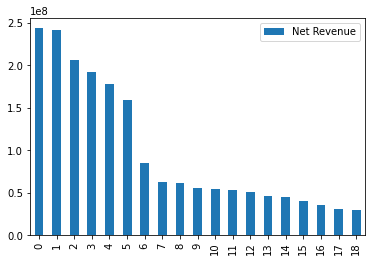

In [110]:
#first attempt at visualization
average_group.plot(kind='bar')

In [111]:
#Groupby genre on net revenue standard deviation
std_group = genre_df_exploded.groupby('genre_ids')['Net Revenue'].std().reset_index()

In [112]:
std_group

,genre_ids,Net Revenue
0,Action,2.779470e+08
1,Adventure,3.242608e+08
2,Animation,2.894359e+08
3,Comedy,1.601675e+08
4,Crime,1.595117e+08
5,Documentary,1.062421e+08
6,Drama,1.117663e+08
7,Family,2.553847e+08
8,Fantasy,3.121838e+08
9,History,6.532625e+07


In [115]:
#groupby genre on count
count_group = genre_df_exploded.groupby('genre_ids')['Net Revenue'].count().reset_index()
count_group

,genre_ids,Net Revenue
0,Action,472
1,Adventure,298
2,Animation,123
3,Comedy,584
4,Crime,241
5,Documentary,69
6,Drama,872
7,Family,187
8,Fantasy,178
9,History,70


## Hypothesis testing

Here we will perform a z-test.

Null Hypothesis: The mean net revenue of animation movies is less than or equal to the mean net revenue of all movies.

Alternative Hypothesis: The mean net revenue of animation is significantly greater than the mean net revenue of all movies.

In [116]:
#statistics for calculating z statistic for Animation 
x_bar = average_group['Net Revenue'][0]
mu = genre_df['Net Revenue'].mean()
n = count_group['Net Revenue'][2]
sigma = genre_df['Net Revenue'].std()
print(x_bar, mu, n, sigma)

243930156.36585367 81571004.87883516 123 184177359.45262742


In [117]:
#z score calculation
z = (x_bar - mu)/(sigma/np.sqrt(n))
z

9.7767179531075

In [118]:
#p value calculation
p = 1 - stats.norm.cdf(z)
p

0.0

Because our z statistic shows that the mean net revenue of animation movies is 9.77 standard deviations greater than the mean net revenue of all movies, our p-value is very very small and rounds to 0, much smaller than a 5% confidence level. In the distribution chart below, you cannot even see the blue shaded area to the right of our p-value. This evidence allows us to reject the null hypothesis and conclude that the mean net revenue of animation movies is significantly greater than the mean net revenue of all movies.

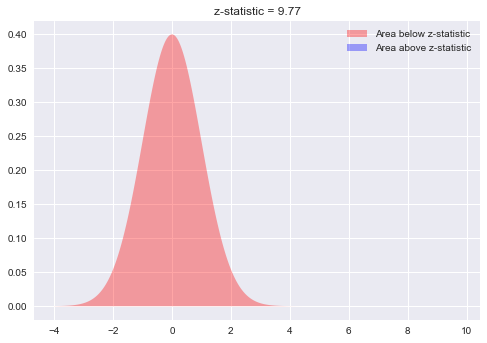

In [119]:
plt.style.use('seaborn')
plt.fill_between(x=np.arange(-4,z,0.01),
                 y1= stats.norm.pdf(np.arange(-4,z,0.01)) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below z-statistic'
                 )

plt.fill_between(x=np.arange(z,4,0.01), 
                 y1= stats.norm.pdf(np.arange(z,4,0.01)) ,
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'Area above z-statistic')
plt.legend()
plt.title ('z-statistic = 9.77');

In [120]:
#groupby genre on net revenue median
median_group = genre_df_exploded.groupby('genre_ids')['Net Revenue'].median()
median_group

genre_ids
Action          50972756.0
Adventure      116199551.0
Animation      146271037.0
Comedy          21599671.5
Crime            8495213.0
Documentary      -100000.0
Drama            5415296.0
Family          78604221.0
Fantasy         86605663.0
History         12012507.5
Horror           8211609.0
Music            3657914.0
Mystery         12608019.0
Romance         10495204.0
SciFi           53461527.0
TV Movie        -1084958.0
Thriller        12215331.0
War              9238343.0
Western         -1882229.0
Name: Net Revenue, dtype: float64

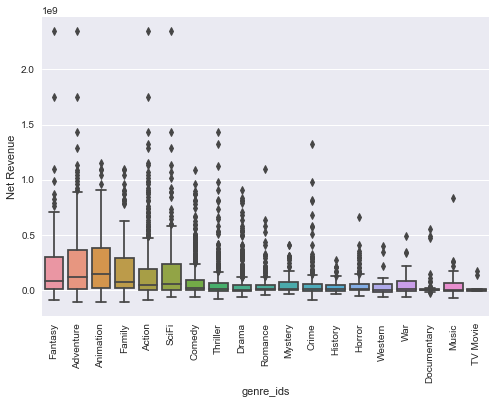

In [121]:
# box plot of net revenue by genre
ax = sns.boxplot(x='genre_ids', y='Net Revenue', data=genre_df_exploded)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

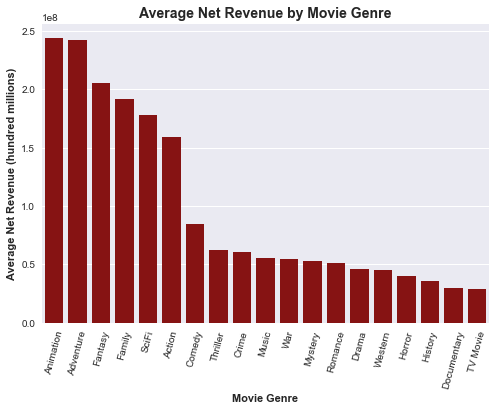

In [122]:
# Final Plot
#average net revenue by movie genre
ax = sns.barplot(data=average_group, x='genre_ids', y='Net Revenue', color='#990000')
ax.set_xticklabels(ax.get_xticklabels(), rotation=75);
ax.set_title('Average Net Revenue by Movie Genre', fontsize = 14, weight = 'bold')
ax.set_ylabel('Average Net Revenue (hundred millions)', weight='bold')
ax.set_xlabel('Movie Genre', weight='bold');
sns.set_style('whitegrid')

In [ ]:
conn.close()